In [1]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"gbiamgaurav","key":"25adcca0b19d33a63cbc1bc66924e01d"}'}

In [2]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d blastchar/telco-customer-churn

telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
! unzip /content/telco-customer-churn.zip

Archive:  /content/telco-customer-churn.zip
replace WA_Fn-UseC_-Telco-Customer-Churn.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [7]:
### Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [8]:
### Load the data 

df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [9]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1645,9490-DFPMD,Female,1,No,No,42,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.65,3541.35,Yes
1381,3717-OEAUQ,Male,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Mailed check,70.70,129.2,No
97,0278-YXOOG,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,Yes
4287,6425-YQLLO,Female,1,Yes,No,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),105.95,6975.25,Yes
85,4445-ZJNMU,Male,0,No,No,9,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.30,918.75,No


In [10]:
df.drop(columns=['customerID'], axis=1, inplace=True)

In [11]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [12]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [14]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [15]:
## Convert Total charges into numbers

#pd.to_numeric(df.TotalCharges)

In [16]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [17]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [18]:
df.shape

(7043, 20)

In [19]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [20]:
df.iloc[488]['TotalCharges']

' '

In [21]:
df1 = df[df.TotalCharges != " "]
df1.shape

(7032, 20)

In [22]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [23]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [24]:
df1.TotalCharges.dtypes

dtype('float64')

In [25]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [26]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

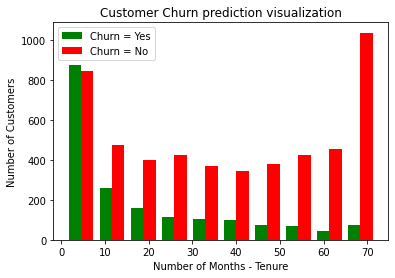

In [27]:
plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn = Yes', 'Churn = No'])
plt.legend()
plt.xlabel('Number of Months - Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn prediction visualization')
plt.show();

In [28]:
mc_charges_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

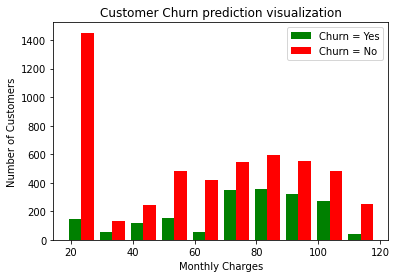

In [29]:
plt.hist([mc_churn_yes, mc_charges_no], color=['green', 'red'], label=['Churn = Yes', 'Churn = No'])
plt.legend()
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn prediction visualization')
plt.show();

In [30]:
for column in df:
  print(f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [31]:
def print_unique_col_values(df):

  for column in df:
    if df[column].dtypes=="object":
      print(f'{column} : {df[column].unique()}')

In [32]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [33]:
## Replace the columns with No

df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

In [34]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [35]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

In [36]:
for col in yes_no_columns:
  df1[col].replace({'Yes': 1, 'No': 0}, inplace=True)

In [37]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [38]:
df1['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

In [39]:
for column in df1:
  print(f'{column} : {df1[column].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


### One Hot Encoding

In [40]:
pd.get_dummies(data=df1, columns=['InternetService'])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,1,0,1,0,0,0,1,0,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0
1,0,0,0,0,34,1,0,1,0,1,...,0,One year,0,Mailed check,56.95,1889.50,0,1,0,0
2,0,0,0,0,2,1,0,1,1,0,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0
3,0,0,0,0,45,0,0,1,0,1,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,One year,1,Mailed check,84.80,1990.50,0,1,0,0
7039,1,0,1,1,72,1,1,0,1,1,...,1,One year,1,Credit card (automatic),103.20,7362.90,0,0,1,0
7040,1,0,1,1,11,0,0,1,0,0,...,0,Month-to-month,1,Electronic check,29.60,346.45,0,1,0,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,Month-to-month,1,Mailed check,74.40,306.60,1,0,1,0


In [41]:
for column in df1:
  print(f'{column} : {df1[column].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [42]:
df2 = pd.get_dummies(data=df1, columns=['Contract', 'PaymentMethod', 'InternetService'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No'],
      dtype='object')

In [43]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,0,34,1,0,1,0,1,...,0,1,0,0,0,0,1,1,0,0
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,0,0,0,1,1,0,0
3,0,0,0,0,45,0,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
4,1,0,0,0,2,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [44]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
4506,0,1,1,0,72,1,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0
1637,0,0,0,0,66,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4198,1,0,1,1,52,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
5496,0,0,1,1,43,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1


In [45]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
Contract_Month-to-month                      uint8
Contract_One year                            uint8
Contract_Two year              

In [46]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [47]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

### Scale the Data

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [49]:
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [50]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
2451,0,0,1,1,0.380282,1,1,1,1,0,...,0,1,0,0,0,1,0,0,1,0
6474,1,0,0,0,0.070423,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1044,1,0,0,0,0.098592,1,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0


In [51]:
for column in df2:
  print(f'{column} : {df2[column].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

### Divide the data into X and y

In [52]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [54]:
X_train.shape

(5625, 26)

In [55]:
X_test.shape

(1407, 26)

In [56]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
6740,1,1,0,0,0.549296,1,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0
5724,0,0,0,0,0.000000,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
6719,0,0,1,0,1.000000,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3298,1,0,0,0,0.042254,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2629,0,0,0,0,0.014085,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
6749,0,0,1,0,0.971831,1,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0
1662,0,0,0,0,0.056338,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3899,1,1,1,0,0.718310,1,1,1,1,1,...,1,0,0,0,0,1,0,0,1,0
448,0,0,1,1,0.098592,1,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
1723,1,0,1,1,0.070423,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1


In [57]:
len(X_train.columns)

26

### Import Tensorflow

In [58]:
import tensorflow as tf
from tensorflow import keras

### Model Building

In [59]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

In [60]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [61]:
model.fit(X_train, y_train, epochs=25)

Epoch 1/25
176/176 [==============================] - 2s 3ms/step - loss: 0.4827 - accuracy: 0.7659
Epoch 2/25
176/176 [==============================] - 0s 3ms/step - loss: 0.4219 - accuracy: 0.7988
Epoch 3/25
176/176 [==============================] - 0s 3ms/step - loss: 0.4158 - accuracy: 0.8020
Epoch 4/25
176/176 [==============================] - 1s 3ms/step - loss: 0.4122 - accuracy: 0.8087
Epoch 5/25
176/176 [==============================] - 0s 3ms/step - loss: 0.4101 - accuracy: 0.8101
Epoch 6/25
176/176 [==============================] - 0s 3ms/step - loss: 0.4083 - accuracy: 0.8101
Epoch 7/25
176/176 [==============================] - 0s 3ms/step - loss: 0.4056 - accuracy: 0.8121
Epoch 8/25
176/176 [==============================] - 0s 3ms/step - loss: 0.4050 - accuracy: 0.8139
Epoch 9/25
176/176 [==============================] - 1s 3ms/step - loss: 0.4017 - accuracy: 0.8139
Epoch 10/25
176/176 [==============================] - 0s 3ms/step - loss: 0.4005 - accuracy: 0.8133

In [62]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4611 - accuracy: 0.7733


[0.461142897605896, 0.7732764482498169]

In [63]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.43587953],
       [0.17253116],
       [0.00675118],
       [0.00967524],
       [0.07479564]], dtype=float32)

In [64]:
y_test[:10]

6466    0
5615    1
5344    0
5564    0
588     0
2764    0
1247    0
2391    0
2832    0
2700    0
Name: Churn, dtype: int64

In [65]:
y_pred = []

for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)  

In [66]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [67]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1009
           1       0.64      0.46      0.54       398

    accuracy                           0.77      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



Text(51.0, 0.5, 'Truth')

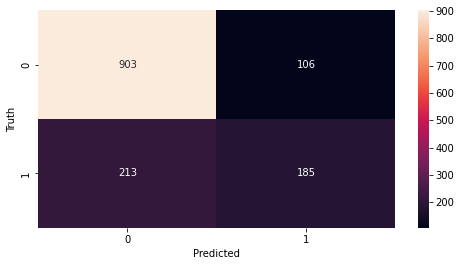

In [68]:
import seaborn as sns

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(8,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [70]:
print("Accuracy Score : ", accuracy_score(y_test, y_pred))

Accuracy Score :  0.7732764747690121


In [71]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):

  model = keras.Sequential([
      keras.layers.Dense(26, input_shape=(26,), activation='relu'),
      keras.layers.Dense(15, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  
  if weights == -1:
    model.fit(X_train, y_train, epochs=100)
  else:
    model.fit(X_train, y_train, epochs=100, class_weight = weights)

  print(model.evaluate(X_test, y_test))

  y_preds = model.predict(X_test)
  y_preds = np.round(y_preds)

  print("Classification report : \n", classification_report(y_test, y_preds))

  return y_preds

In [72]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4869 - accuracy: 0.7733
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4239 - accuracy: 0.7979
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4177 - accuracy: 0.8050
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4154 - accuracy: 0.8073
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4129 - accuracy: 0.8082
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4115 - accuracy: 0.8068
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4077 - accuracy: 0.8105
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4052 - accuracy: 0.8124
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4050 - accuracy: 0.8124
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4030 - accura

In [73]:
y_test.value_counts()

0    1009
1     398
Name: Churn, dtype: int64

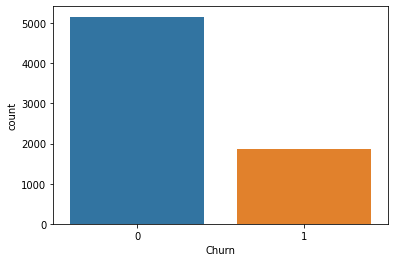

In [81]:
sns.countplot(df2['Churn'])

### Method 1 - UnderSampling

In [82]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [83]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [84]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [85]:
# Number of classes in training Data
y_train.value_counts()


0    1495
1    1495
Name: Churn, dtype: int64

In [86]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 6ms/step - loss: 0.6200 - accuracy: 0.6970
Epoch 2/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5172 - accuracy: 0.7535
Epoch 3/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4953 - accuracy: 0.7612
Epoch 4/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4868 - accuracy: 0.7662
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4832 - accuracy: 0.7699
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4770 - accuracy: 0.7712
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4753 - accuracy: 0.7696
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4736 - accuracy: 0.7736
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4714 - accuracy: 0.7729
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4696 - accuracy: 0.7769
Epoch 11/

### Accuracy increased from 0.57 to 0.73

### Method 2 - OverSampling

In [87]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())


Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [88]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [89]:
# Number of classes in training Data
y_train.value_counts()


1    4130
0    4130
Name: Churn, dtype: int64

In [90]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 5ms/step - loss: 0.5407 - accuracy: 0.7335
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4893 - accuracy: 0.7639
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4800 - accuracy: 0.7686
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4745 - accuracy: 0.7719
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4698 - accuracy: 0.7745
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4665 - accuracy: 0.7760
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4628 - accuracy: 0.7777
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4597 - accuracy: 0.7821
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4569 - accuracy: 0.7854
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4541 - accura

### Method 3 - SMOTE

In [91]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [97]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [93]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [95]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [96]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 4ms/step - loss: 0.5227 - accuracy: 0.7453
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4700 - accuracy: 0.7770
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4610 - accuracy: 0.7793
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4542 - accuracy: 0.7862
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4487 - accuracy: 0.7901
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4446 - accuracy: 0.7914
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4395 - accuracy: 0.7954
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4368 - accuracy: 0.7967
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4326 - accuracy: 0.7993
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4295 - accura

### f1 score improved from 0.56 to 0.80

### Method 4 - Use of Ensemble with undersampling

In [98]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [99]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [101]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [102]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [103]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,1,1,0,0,0,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,0,0,0,1,1,0,0,0


In [104]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [105]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train 

In [106]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 4ms/step - loss: 0.6332 - accuracy: 0.6559
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5182 - accuracy: 0.7528
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4966 - accuracy: 0.7645
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4903 - accuracy: 0.7699
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4860 - accuracy: 0.7719
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4854 - accuracy: 0.7719
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4809 - accuracy: 0.7729
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4783 - accuracy: 0.7749
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4772 - accuracy: 0.7719
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4744 - accuracy: 0.7759
Epoch 11/

In [107]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 5ms/step - loss: 0.5924 - accuracy: 0.7097
Epoch 2/100
94/94 [==============================] - 1s 5ms/step - loss: 0.5207 - accuracy: 0.7502
Epoch 3/100
94/94 [==============================] - 1s 5ms/step - loss: 0.5007 - accuracy: 0.7542
Epoch 4/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4936 - accuracy: 0.7599
Epoch 5/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4893 - accuracy: 0.7609
Epoch 6/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4855 - accuracy: 0.7639
Epoch 7/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4821 - accuracy: 0.7632
Epoch 8/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4795 - accuracy: 0.7679
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4786 - accuracy: 0.7719
Epoch 10/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4757 - accuracy: 0.7686
Epoch 11/

In [108]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 3ms/step - loss: 0.6321 - accuracy: 0.6444
Epoch 2/100
83/83 [==============================] - 0s 3ms/step - loss: 0.5123 - accuracy: 0.7552
Epoch 3/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4920 - accuracy: 0.7655
Epoch 4/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4864 - accuracy: 0.7643
Epoch 5/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4800 - accuracy: 0.7708
Epoch 6/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4768 - accuracy: 0.7731
Epoch 7/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4729 - accuracy: 0.7734
Epoch 8/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4694 - accuracy: 0.7776
Epoch 9/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4679 - accuracy: 0.7750
Epoch 10/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4633 - accuracy: 0.7776
Epoch 11/

In [109]:
len(y_pred1)

1407

In [110]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [111]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.66      0.76      1033
           1       0.46      0.80      0.58       374

    accuracy                           0.70      1407
   macro avg       0.68      0.73      0.67      1407
weighted avg       0.78      0.70      0.71      1407

